# Machine Learning 1 - Project

## Data Inspection - Diabetes Dataset

The goal of the Data Exploration phase is to understand the structure, quality, and distribution of the data, identifying potential issues such as missing values, zero counts, and imbalance in the target variable (diabetes). Below is the breakdown of the steps taken, their purpose, and the results obtained.

In [1]:
# Importing Relevant Packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# 1. Load the Diabetes dataset
diabetes_no_balanced = pd.read_csv('diabetes_prediction_dataset.csv')

print(f"Dataset shape: {diabetes_no_balanced.shape}")

diabetes_no_balanced.describe(include='all')



Dataset shape: (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


Purpose: Load the dataset into a pandas DataFrame and inspect its size and statistical properties.
Results:Dataset shape: (100,000, 9) → 100,000 rows and 9 columns.
Descriptive statistics showed:
The diabetes column has a mean of 0.085, indicating a class imbalance (most samples are negative).
Several categorical columns like gender and smoking_history were identified.

#### Inspecting Column Data Types and Missing Values

In [3]:
# Print the data types of all columns
print(diabetes_no_balanced.dtypes)

# Count the number of NaN values in each column
nan_counts = diabetes_no_balanced.isna().sum()

# Count the number of 0 values in each column
zero_counts = (diabetes_no_balanced == 0).sum()

# Combine the counts into a DataFrame for better readability
counts = pd.DataFrame({'NaN Count': nan_counts, 'Zero Count': zero_counts})

# Print the result
print(counts)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
                     NaN Count  Zero Count
gender                       0           0
age                          0           0
hypertension                 0       92515
heart_disease                0       96058
smoking_history              0           0
bmi                          0           0
HbA1c_level                  0           0
blood_glucose_level          0           0
diabetes                     0       91500


Purpose:
Check data types to confirm which columns are numeric (int64, float64) or categorical (object).
Count missing (NaN) values and zero entries in each column to identify potential data quality issues.
Results:
No missing (NaN) values in the dataset.
Columns like hypertension, heart_disease, and diabetes had a significant number of zero values:
hypertension: 92,515 zeros
heart_disease: 96,058 zeros
diabetes: 91,500 zeros

#### Visualizing Distributions

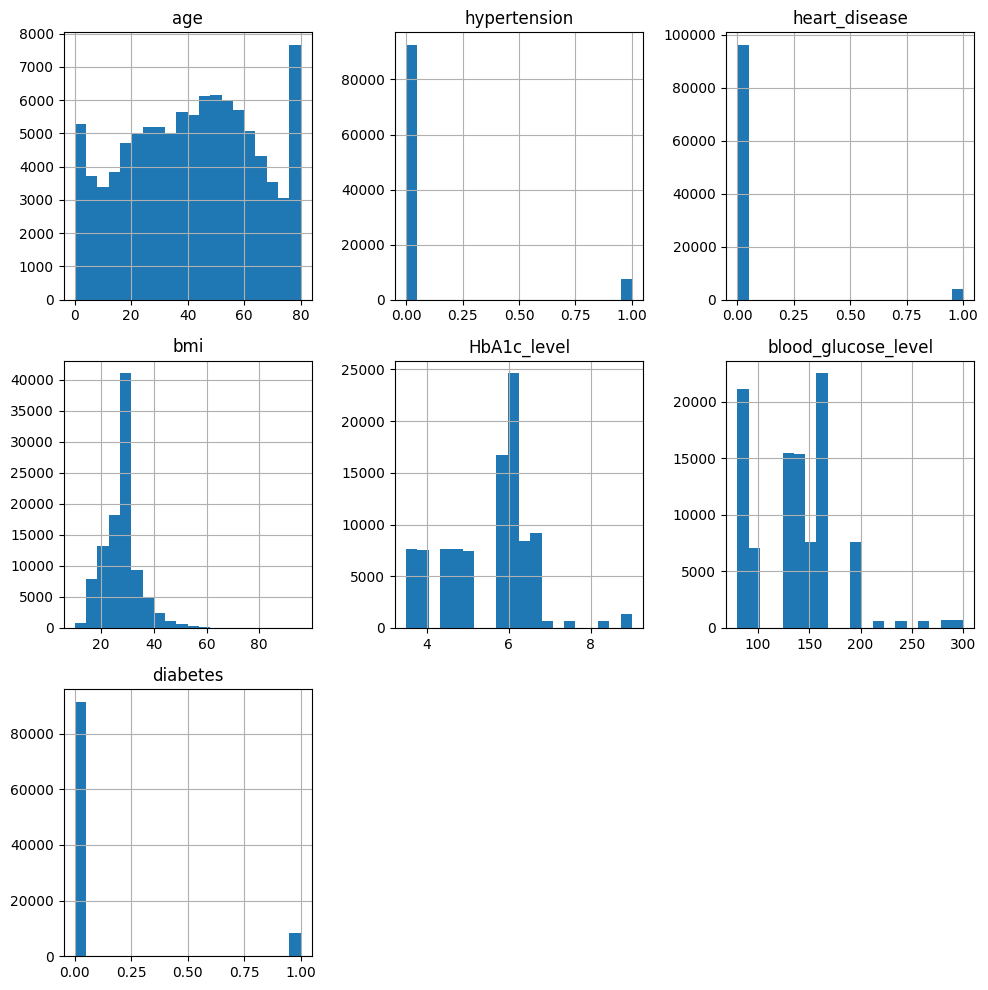

In [4]:
#Visualizing Distribtuion

import matplotlib.pyplot as plt
diabetes_no_balanced.hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()


Purpose: Visualize the distribution of each numeric column to understand their range, central tendency, and skewness.
Results:
Age: Most entries are between 20 and 80, with a peak around 40–50.
BMI: Skewed distribution with values clustered around 25–30.
HbA1c_level: Peaks around 5–6, matching expected values for blood glucose levels.
Blood Glucose Level: Multimodal distribution with clusters around 100, 150, and 200.
Diabetes (target): Severe class imbalance, with far fewer positive cases (1) than negative (0).

## Data Cleaning

**Data Cleaning** is the process of preparing raw data for analysis by addressing issues such as duplicates, missing values, invalid entries, or outliers. This step ensures that the data is accurate, consistent, and relevant for machine learning models. After exploring the dataset, we decided to:
1. Take a snapshot of **10,000 entries** from the original dataset (100,000 rows) to ensure manageable computational load and align the size with our second dataset, which has closer to 10,000 entries.
2. Confirm that there were **no missing values** or **duplicates**.
3. Retain **outliers** since they are part of real-world data and can provide valuable insights for model training.

In [5]:

# 2. Separate positive and negative cases
positive_cases = diabetes_no_balanced[diabetes_no_balanced['diabetes'] == 1]  # Assuming '1' indicates positive diabetes cases
negative_cases = diabetes_no_balanced[diabetes_no_balanced['diabetes'] == 0]  # Assuming '0' indicates negative diabetes cases

# 3. Take 5,000 rows from each category
positive_subset = positive_cases.head(5000)
negative_subset = negative_cases.head(5000)

# 4. Combine the positive and negative subsets
diabetes = pd.concat([positive_subset, negative_subset], axis=0)

# 5. Shuffle the dataset to randomize the rows
diabetes = diabetes.sample(frac=1, random_state=42).reset_index(drop=True)

# 6. Print the number of positive and negative cases to confirm balance
positive_count = diabetes['diabetes'].value_counts()[1]
negative_count = diabetes['diabetes'].value_counts()[0]

print(f"Number of positive cases: {positive_count}")
print(f"Number of negative cases: {negative_count}")
print(f"Total dataset size: {diabetes.shape[0]} rows")

# 7. Optionally, save the new balanced dataset to a CSV file (optional)
# balanced_diabetes.to_csv('balanced_diabetes.csv', index=False)

Number of positive cases: 5000
Number of negative cases: 5000
Total dataset size: 10000 rows


#### New Dataset Inspection

In [10]:
diabetes.describe(include='all')

# Print the data types of all columns
print(diabetes.dtypes)

# Count the number of NaN values in each column
nan_counts = diabetes.isna().sum()

# Count the number of 0 values in each column
zero_counts = (diabetes == 0).sum()

# Combine the counts into a DataFrame for better readability
counts = pd.DataFrame({'NaN Count': nan_counts, 'Zero Count': zero_counts})

# Print the result
print(counts)


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
                     NaN Count  Zero Count
gender                       0           0
age                          0           0
hypertension                 0        8479
heart_disease                0        9120
smoking_history              0           0
bmi                          0           0
HbA1c_level                  0           0
blood_glucose_level          0           0
diabetes                     0        5000


In [11]:
""" import matplotlib.pyplot as plt

# Generate individual horizontal boxplots for each column
for column in diabetes.columns:
     plt.figure(figsize=(8, 6))
     plt.boxplot(diabetes[column], vert=False)
     plt.title(f'Horizontal Boxplot of {column}')
     plt.xlabel('Values')
     plt.grid(True)
     plt.show() """


" import matplotlib.pyplot as plt\n\n# Generate individual horizontal boxplots for each column\nfor column in diabetes.columns:\n     plt.figure(figsize=(8, 6))\n     plt.boxplot(diabetes[column], vert=False)\n     plt.title(f'Horizontal Boxplot of {column}')\n     plt.xlabel('Values')\n     plt.grid(True)\n     plt.show() "

### Feature Selection

In [12]:
# Coverting Categorical features into binary

# 1. Convert 'Female' to 0 and 'Male' to 1
diabetes['gender'] = diabetes['gender'].replace({'Female': 0, 'Male': 1})

diabetes['gender'] = diabetes['gender'].astype(int)

print(diabetes['gender'].value_counts())

# 2. Converting Smoking History

diabetes['smoking_history'] = diabetes['smoking_history'].replace({'No Info': 0, 'never': 0, 'former': 1, 'ever': 0, 'current': 1, 'not current': 0})

diabetes['smoking_history'] = diabetes['smoking_history'].astype(int)

print(diabetes['smoking_history'].value_counts())

# Observing the results

print(diabetes.dtypes)



gender
0    5534
1    4466
Name: count, dtype: int64
smoking_history
0    7619
1    2381
Name: count, dtype: int64
gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


C:\Users\Samuele Biondi\AppData\Local\Temp\ipykernel_15020\4118663383.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes['gender'] = diabetes['gender'].replace({'Female': 0, 'Male': 1})
C:\Users\Samuele Biondi\AppData\Local\Temp\ipykernel_15020\4118663383.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes['smoking_history'] = diabetes['smoking_history'].replace({'No Info': 0, 'never': 0, 'former': 1, 'ever': 0, 'current': 1, 'not current': 0})


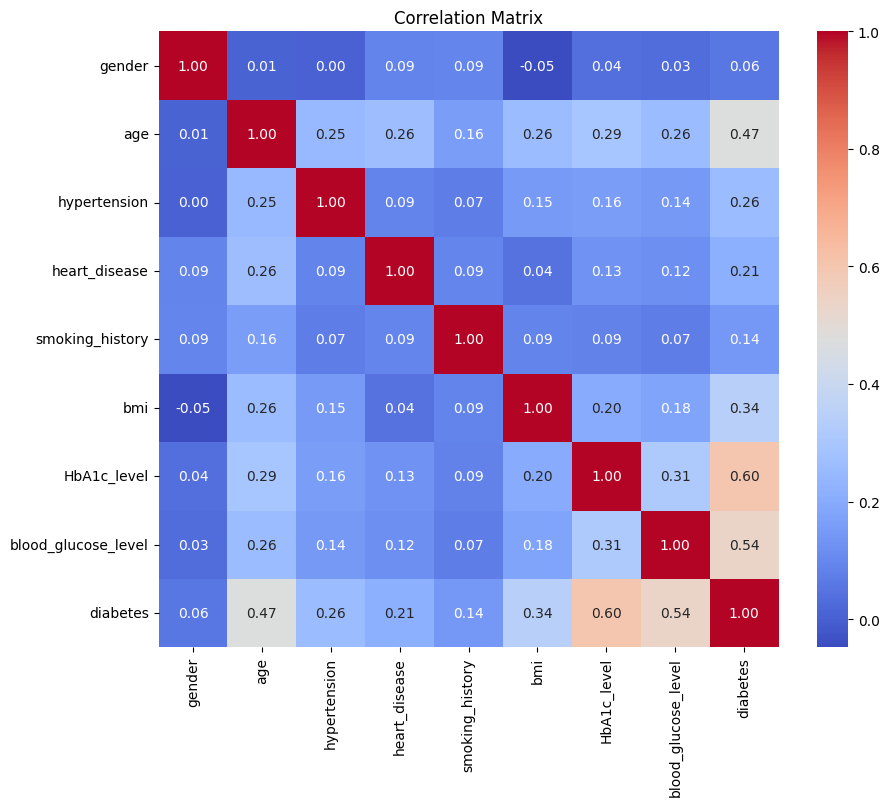

In [13]:
# Compute the correlation matrix for numeric columns
correlation_matrix = diabetes.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [14]:
diabetes.describe()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.446600,50.481624,0.152100,0.088000,0.238100,29.489158,6.167770,163.523500,0.500000
std,0.497165,21.505493,0.359136,0.283309,0.425942,7.468935,1.278503,57.143059,0.500025
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,36.000000,0.000000,0.000000,0.000000,25.760000,5.700000,130.000000,0.000000
50%,0.000000,54.000000,0.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.500000
75%,1.000000,67.000000,0.000000,0.000000,0.000000,32.880000,6.600000,200.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [15]:
diabetes.shape

(10000, 9)

In [16]:
diabetes.to_csv('diabetes_clean.csv', index=False)

## Data Modeling

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Separate features (X) and target (y)
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# -------------------------------
# Build the Neural Network
# -------------------------------
def build_model(hidden_layers, neurons_per_layer, learning_rate, dropout):
    model = Sequential()
    
    # Add input layer and first hidden layer
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout))
    
    # Add additional hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(dropout))
    
    # Add output layer
    model.add(Dense(1, activation="sigmoid"))  # Binary classification
    
    # Compile the model
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Train the model with Early Stopping
def train_model(model, X_train, y_train, X_val, y_val, batch_size, epochs):
    # Define the EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[early_stopping],
        verbose=1
    )
    return history

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5
    return accuracy_score(y_test, y_pred)

# -------------------------------
# Hyperparameter Grid
# -------------------------------
hidden_layers_list = [1, 2]                # Number of hidden layers
neurons_per_layer_list = [32, 64, 128]    # Neurons per layer
learning_rates = [0.001, 0.01]            # Learning rates
batch_sizes = [16, 32]                    # Batch sizes
dropouts = [0.3, 0.5]                     # Dropout rates
epochs = 50                               # Epochs

# -------------------------------
# Training Loop
# -------------------------------
results = []

for hidden_layers in hidden_layers_list:
    for neurons_per_layer in neurons_per_layer_list:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:
                for dropout in dropouts:
                    print(f"\nTraining model with: hidden_layers={hidden_layers}, neurons_per_layer={neurons_per_layer}, learning_rate={learning_rate}, batch_size={batch_size}, dropout={dropout}")
                    
                    # Build and train the model
                    model = build_model(hidden_layers, neurons_per_layer, learning_rate, dropout)
                    history = train_model(model, X_train, y_train, X_val, y_val, batch_size, epochs)
                    
                    # Evaluate on test set
                    test_accuracy = evaluate_model(model, X_test, y_test)
                    validation_loss = min(history.history['val_loss'])
                    
                    # Store results
                    results.append({
                        "Hidden Layers": hidden_layers,
                        "Neurons per Layer": neurons_per_layer,
                        "Learning Rate": learning_rate,
                        "Batch Size": batch_size,
                        "Dropout": dropout,
                        "Validation Loss": validation_loss,
                        "Test Accuracy": test_accuracy
                    })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Sort by test accuracy (descending) and validation loss (ascending)
results_df = results_df.sort_values(by=["Test Accuracy", "Validation Loss"], ascending=[False, True])

print("\nHyperparameter Tuning Results:")
print(results_df)

# Display the best configuration
best_config = results_df.iloc[0]
print("\nBest Configuration:")
print(best_config)



Training model with: hidden_layers=1, neurons_per_layer=32, learning_rate=0.001, batch_size=16, dropout=0.3


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7543 - loss: 0.4981 - val_accuracy: 0.8820 - val_loss: 0.2732
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 0.2776 - val_accuracy: 0.8867 - val_loss: 0.2587
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8724 - loss: 0.2769 - val_accuracy: 0.8787 - val_loss: 0.2592
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.2538 - val_accuracy: 0.8887 - val_loss: 0.2568
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8828 - loss: 0.2612 - val_accuracy: 0.8867 - val_loss: 0.2573
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.2610 - val_accuracy: 0.8840 - val_loss: 0.2559
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8838 - loss: 0.2580 - val_accuracy: 0.8813 - val_loss: 0.2569
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8802 - loss: 0.2593 - val_accuracy: 0.

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7119 - loss: 0.5397 - val_accuracy: 0.8767 - val_loss: 0.2784
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8638 - loss: 0.3015 - val_accuracy: 0.8793 - val_loss: 0.2586
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8782 - loss: 0.2754 - val_accuracy: 0.8800 - val_loss: 0.2575
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8885 - loss: 0.2639 - val_accuracy: 0.8853 - val_loss: 0.2550
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8814 - loss: 0.2669 - val_accuracy: 0.8867 - val_loss: 0.2539
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.2538 - val_accuracy: 0.8827 - val_loss: 0.2526
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8799 - loss: 0.2641 - val_accuracy: 0.8840 - val_loss: 0.2513
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8849 - loss: 0.2514 - val_accuracy: 0.8840 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7225 - loss: 0.5483 - val_accuracy: 0.8747 - val_loss: 0.3110
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.3035 - val_accuracy: 0.8813 - val_loss: 0.2680
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.2776 - val_accuracy: 0.8833 - val_loss: 0.2609
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8764 - loss: 0.2731 - val_accuracy: 0.8833 - val_loss: 0.2592
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8849 - loss: 0.2602 - val_accuracy: 0.8827 - val_loss: 0.2582
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.2593 - val_accuracy: 0.8833 - val_loss: 0.2580
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8849 - loss: 0.2527 - val_accuracy: 0.8820 - val_loss: 0.2573
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8897 - loss: 0.2520 - val_accuracy: 0.8820 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5868 - loss: 0.6730 - val_accuracy: 0.8640 - val_loss: 0.3515
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.3637 - val_accuracy: 0.8747 - val_loss: 0.2824
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3004 - val_accuracy: 0.8793 - val_loss: 0.2664
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.2913 - val_accuracy: 0.8840 - val_loss: 0.2601
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8745 - loss: 0.2800 - val_accuracy: 0.8840 - val_loss: 0.2578
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.2781 - val_accuracy: 0.8840 - val_loss: 0.2576
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8812 - loss: 0.2645 - val_accuracy: 0.8847 - val_loss: 0.2569
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8831 - loss: 0.2629 - val_accuracy: 0.8820 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8386 - loss: 0.3382 - val_accuracy: 0.8833 - val_loss: 0.2633
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8856 - loss: 0.2507 - val_accuracy: 0.8793 - val_loss: 0.2531
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8774 - loss: 0.2629 - val_accuracy: 0.8847 - val_loss: 0.2366
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8934 - loss: 0.2308 - val_accuracy: 0.8987 - val_loss: 0.2247
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8925 - loss: 0.2195 - val_accuracy: 0.8913 - val_loss: 0.2234
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8960 - loss: 0.2154 - val_accuracy: 0.8947 - val_loss: 0.2206
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8945 - loss: 0.2117 - val_accuracy: 0.9040 - val_loss: 0.2055
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9020 - loss: 0.2132 - val_accuracy: 0.9007 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8429 - loss: 0.3450 - val_accuracy: 0.8780 - val_loss: 0.2606
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8800 - loss: 0.2613 - val_accuracy: 0.8833 - val_loss: 0.2473
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8879 - loss: 0.2494 - val_accuracy: 0.8853 - val_loss: 0.2414
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8938 - loss: 0.2335 - val_accuracy: 0.8940 - val_loss: 0.2319
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8884 - loss: 0.2426 - val_accuracy: 0.8920 - val_loss: 0.2266
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8843 - loss: 0.2410 - val_accuracy: 0.8953 - val_loss: 0.2208
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8940 - loss: 0.2294 - val_accuracy: 0.8960 - val_loss: 0.2189
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8956 - loss: 0.2201 - val_accuracy: 0.8947 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8185 - loss: 0.3752 - val_accuracy: 0.8807 - val_loss: 0.2589
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8745 - loss: 0.2615 - val_accuracy: 0.8840 - val_loss: 0.2521
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8822 - loss: 0.2553 - val_accuracy: 0.8793 - val_loss: 0.2452
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8823 - loss: 0.2512 - val_accuracy: 0.8913 - val_loss: 0.2330
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8907 - loss: 0.2423 - val_accuracy: 0.8893 - val_loss: 0.2339
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9044 - loss: 0.2125 - val_accuracy: 0.8940 - val_loss: 0.2154
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8986 - loss: 0.2086 - val_accuracy: 0.8967 - val_loss: 0.2122
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8962 - loss: 0.2118 - val_accuracy: 0.8940 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8305 - loss: 0.3562 - val_accuracy: 0.8833 - val_loss: 0.2584
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.2636 - val_accuracy: 0.8793 - val_loss: 0.2539
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8918 - loss: 0.2513 - val_accuracy: 0.8840 - val_loss: 0.2477
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8835 - loss: 0.2578 - val_accuracy: 0.8847 - val_loss: 0.2456
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8964 - loss: 0.2349 - val_accuracy: 0.8840 - val_loss: 0.2370
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8864 - loss: 0.2478 - val_accuracy: 0.8867 - val_loss: 0.2313
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.2429 - val_accuracy: 0.8953 - val_loss: 0.2215
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8943 - loss: 0.2229 - val_accuracy: 0.8900 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7843 - loss: 0.4515 - val_accuracy: 0.8820 - val_loss: 0.2645
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8832 - loss: 0.2619 - val_accuracy: 0.8860 - val_loss: 0.2565
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8797 - loss: 0.2546 - val_accuracy: 0.8813 - val_loss: 0.2553
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8829 - loss: 0.2573 - val_accuracy: 0.8853 - val_loss: 0.2555
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8817 - loss: 0.2551 - val_accuracy: 0.8860 - val_loss: 0.2564
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8712 - loss: 0.2610 - val_accuracy: 0.8827 - val_loss: 0.2548
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8803 - loss: 0.2571 - val_accuracy: 0.8827 - val_loss: 0.2533
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.2350 - val_accuracy: 0.8847 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7627 - loss: 0.4811 - val_accuracy: 0.8773 - val_loss: 0.2665
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8773 - loss: 0.2785 - val_accuracy: 0.8833 - val_loss: 0.2578
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8852 - loss: 0.2620 - val_accuracy: 0.8840 - val_loss: 0.2559
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.2666 - val_accuracy: 0.8813 - val_loss: 0.2557
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.2572 - val_accuracy: 0.8820 - val_loss: 0.2575
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8804 - loss: 0.2584 - val_accuracy: 0.8833 - val_loss: 0.2560
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.2573 - val_accuracy: 0.8833 - val_loss: 0.2545
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8766 - loss: 0.2552 - val_accuracy: 0.8827 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7814 - loss: 0.4794 - val_accuracy: 0.8787 - val_loss: 0.2796
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.2892 - val_accuracy: 0.8840 - val_loss: 0.2587
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.2652 - val_accuracy: 0.8820 - val_loss: 0.2570
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8802 - loss: 0.2600 - val_accuracy: 0.8833 - val_loss: 0.2556
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8914 - loss: 0.2480 - val_accuracy: 0.8827 - val_loss: 0.2554
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8786 - loss: 0.2596 - val_accuracy: 0.8813 - val_loss: 0.2550
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8858 - loss: 0.2458 - val_accuracy: 0.8807 - val_loss: 0.2565
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.2523 - val_accuracy: 0.8833 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6711 - loss: 0.5840 - val_accuracy: 0.8787 - val_loss: 0.2938
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3013 - val_accuracy: 0.8813 - val_loss: 0.2634
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.2813 - val_accuracy: 0.8840 - val_loss: 0.2582
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8816 - loss: 0.2647 - val_accuracy: 0.8820 - val_loss: 0.2583
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8813 - loss: 0.2662 - val_accuracy: 0.8847 - val_loss: 0.2559
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8787 - loss: 0.2599 - val_accuracy: 0.8867 - val_loss: 0.2551
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8782 - loss: 0.2602 - val_accuracy: 0.8827 - val_loss: 0.2555
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8745 - loss: 0.2635 - val_accuracy: 0.8840 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8607 - loss: 0.3035 - val_accuracy: 0.8860 - val_loss: 0.2545
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8829 - loss: 0.2513 - val_accuracy: 0.8913 - val_loss: 0.2398
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8910 - loss: 0.2247 - val_accuracy: 0.8953 - val_loss: 0.2277
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9039 - loss: 0.2058 - val_accuracy: 0.8820 - val_loss: 0.2356
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8941 - loss: 0.2215 - val_accuracy: 0.8960 - val_loss: 0.2092
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8959 - loss: 0.2193 - val_accuracy: 0.8967 - val_loss: 0.2061
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9049 - loss: 0.2013 - val_accuracy: 0.9033 - val_loss: 0.2039
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8986 - loss: 0.2030 - val_accuracy: 0.8947 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8545 - loss: 0.3129 - val_accuracy: 0.8833 - val_loss: 0.2518
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - loss: 0.2639 - val_accuracy: 0.8767 - val_loss: 0.2483
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.2473 - val_accuracy: 0.8800 - val_loss: 0.2354
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8911 - loss: 0.2324 - val_accuracy: 0.8820 - val_loss: 0.2333
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8857 - loss: 0.2342 - val_accuracy: 0.8900 - val_loss: 0.2248
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - loss: 0.2332 - val_accuracy: 0.9027 - val_loss: 0.2135
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8959 - loss: 0.2225 - val_accuracy: 0.8960 - val_loss: 0.2111
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8937 - loss: 0.2190 - val_accuracy: 0.8913 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8490 - loss: 0.3224 - val_accuracy: 0.8820 - val_loss: 0.2594
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8806 - loss: 0.2637 - val_accuracy: 0.8787 - val_loss: 0.2546
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8863 - loss: 0.2521 - val_accuracy: 0.8867 - val_loss: 0.2385
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8898 - loss: 0.2314 - val_accuracy: 0.8800 - val_loss: 0.2337
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8931 - loss: 0.2284 - val_accuracy: 0.8967 - val_loss: 0.2184
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8994 - loss: 0.2091 - val_accuracy: 0.9000 - val_loss: 0.2137
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8959 - loss: 0.2196 - val_accuracy: 0.8967 - val_loss: 0.2097
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9028 - loss: 0.2108 - val_accuracy: 0.8940 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8534 - loss: 0.3292 - val_accuracy: 0.8793 - val_loss: 0.2609
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 0.2501 - val_accuracy: 0.8833 - val_loss: 0.2510
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8834 - loss: 0.2475 - val_accuracy: 0.8873 - val_loss: 0.2414
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8934 - loss: 0.2372 - val_accuracy: 0.8813 - val_loss: 0.2379
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8928 - loss: 0.2286 - val_accuracy: 0.8940 - val_loss: 0.2262
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.2298 - val_accuracy: 0.8953 - val_loss: 0.2182
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.2225 - val_accuracy: 0.9007 - val_loss: 0.2152
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8914 - loss: 0.2208 - val_accuracy: 0.9000 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7882 - loss: 0.4431 - val_accuracy: 0.8847 - val_loss: 0.2608
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8817 - loss: 0.2553 - val_accuracy: 0.8847 - val_loss: 0.2582
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8833 - loss: 0.2526 - val_accuracy: 0.8820 - val_loss: 0.2554
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8878 - loss: 0.2418 - val_accuracy: 0.8827 - val_loss: 0.2553
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8860 - loss: 0.2503 - val_accuracy: 0.8813 - val_loss: 0.2546
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8820 - loss: 0.2451 - val_accuracy: 0.8833 - val_loss: 0.2550
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8869 - loss: 0.2487 - val_accuracy: 0.8847 - val_loss: 0.2529
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8911 - loss: 0.2413 - val_accuracy: 0.8847 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8032 - loss: 0.4290 - val_accuracy: 0.8847 - val_loss: 0.2588
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8764 - loss: 0.2695 - val_accuracy: 0.8833 - val_loss: 0.2549
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8899 - loss: 0.2443 - val_accuracy: 0.8827 - val_loss: 0.2549
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8824 - loss: 0.2547 - val_accuracy: 0.8813 - val_loss: 0.2567
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8778 - loss: 0.2596 - val_accuracy: 0.8853 - val_loss: 0.2537
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8901 - loss: 0.2479 - val_accuracy: 0.8867 - val_loss: 0.2534
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8925 - loss: 0.2331 - val_accuracy: 0.8847 - val_loss: 0.2530
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8873 - loss: 0.2457 - val_accuracy: 0.8833 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7961 - loss: 0.4540 - val_accuracy: 0.8800 - val_loss: 0.2646
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8834 - loss: 0.2631 - val_accuracy: 0.8800 - val_loss: 0.2590
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8890 - loss: 0.2454 - val_accuracy: 0.8793 - val_loss: 0.2554
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8965 - loss: 0.2312 - val_accuracy: 0.8840 - val_loss: 0.2540
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8897 - loss: 0.2411 - val_accuracy: 0.8800 - val_loss: 0.2552
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8905 - loss: 0.2402 - val_accuracy: 0.8780 - val_loss: 0.2541
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8847 - loss: 0.2500 - val_accuracy: 0.8813 - val_loss: 0.2534
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8898 - loss: 0.2410 - val_accuracy: 0.8840 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7858 - loss: 0.4603 - val_accuracy: 0.8807 - val_loss: 0.2676
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8779 - loss: 0.2666 - val_accuracy: 0.8847 - val_loss: 0.2584
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8801 - loss: 0.2588 - val_accuracy: 0.8840 - val_loss: 0.2569
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8823 - loss: 0.2541 - val_accuracy: 0.8833 - val_loss: 0.2574
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8914 - loss: 0.2443 - val_accuracy: 0.8820 - val_loss: 0.2559
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8893 - loss: 0.2487 - val_accuracy: 0.8827 - val_loss: 0.2552
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8846 - loss: 0.2524 - val_accuracy: 0.8847 - val_loss: 0.2544
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8903 - loss: 0.2449 - val_accuracy: 0.8807 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8573 - loss: 0.2935 - val_accuracy: 0.8820 - val_loss: 0.2533
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8861 - loss: 0.2431 - val_accuracy: 0.8873 - val_loss: 0.2365
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8935 - loss: 0.2277 - val_accuracy: 0.8927 - val_loss: 0.2194
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8970 - loss: 0.2183 - val_accuracy: 0.8940 - val_loss: 0.2178
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8992 - loss: 0.2127 - val_accuracy: 0.8953 - val_loss: 0.2155
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8985 - loss: 0.2109 - val_accuracy: 0.9000 - val_loss: 0.2104
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8978 - loss: 0.2030 - val_accuracy: 0.8993 - val_loss: 0.2068
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9049 - loss: 0.2015 - val_accuracy: 0.9053 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8652 - loss: 0.2968 - val_accuracy: 0.8800 - val_loss: 0.2659
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8817 - loss: 0.2590 - val_accuracy: 0.8927 - val_loss: 0.2378
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8849 - loss: 0.2376 - val_accuracy: 0.8960 - val_loss: 0.2255
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8970 - loss: 0.2236 - val_accuracy: 0.9000 - val_loss: 0.2125
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8946 - loss: 0.2237 - val_accuracy: 0.9000 - val_loss: 0.2162
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8961 - loss: 0.2147 - val_accuracy: 0.8973 - val_loss: 0.2065
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8931 - loss: 0.2215 - val_accuracy: 0.8880 - val_loss: 0.2205
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8989 - loss: 0.2160 - val_accuracy: 0.9020 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.3309 - val_accuracy: 0.8760 - val_loss: 0.2601
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8838 - loss: 0.2481 - val_accuracy: 0.8913 - val_loss: 0.2374
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8836 - loss: 0.2339 - val_accuracy: 0.8913 - val_loss: 0.2321
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: 0.2271 - val_accuracy: 0.8980 - val_loss: 0.2148
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8949 - loss: 0.2202 - val_accuracy: 0.8967 - val_loss: 0.2159
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8994 - loss: 0.2088 - val_accuracy: 0.8993 - val_loss: 0.2136
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9044 - loss: 0.2006 - val_accuracy: 0.9007 - val_loss: 0.2066
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8973 - loss: 0.2089 - val_accuracy: 0.8980 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.2958 - val_accuracy: 0.8800 - val_loss: 0.2608
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8846 - loss: 0.2511 - val_accuracy: 0.8713 - val_loss: 0.2571
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8806 - loss: 0.2463 - val_accuracy: 0.8853 - val_loss: 0.2344
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8925 - loss: 0.2313 - val_accuracy: 0.8993 - val_loss: 0.2192
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8915 - loss: 0.2256 - val_accuracy: 0.8980 - val_loss: 0.2165
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8903 - loss: 0.2203 - val_accuracy: 0.9033 - val_loss: 0.2093
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8990 - loss: 0.2195 - val_accuracy: 0.8967 - val_loss: 0.2145
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8993 - loss: 0.2121 - val_accuracy: 0.8927 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7300 - loss: 0.5054 - val_accuracy: 0.8800 - val_loss: 0.2678
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8802 - loss: 0.2799 - val_accuracy: 0.8867 - val_loss: 0.2567
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8774 - loss: 0.2699 - val_accuracy: 0.8847 - val_loss: 0.2543
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8831 - loss: 0.2556 - val_accuracy: 0.8833 - val_loss: 0.2518
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8800 - loss: 0.2674 - val_accuracy: 0.8820 - val_loss: 0.2511
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8797 - loss: 0.2608 - val_accuracy: 0.8847 - val_loss: 0.2497
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8888 - loss: 0.2496 - val_accuracy: 0.8860 - val_loss: 0.2474
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8889 - loss: 0.2462 - val_accuracy: 0.8820 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6900 - loss: 0.5595 - val_accuracy: 0.8767 - val_loss: 0.2683
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8622 - loss: 0.3154 - val_accuracy: 0.8853 - val_loss: 0.2590
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8795 - loss: 0.2857 - val_accuracy: 0.8780 - val_loss: 0.2557
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8733 - loss: 0.2901 - val_accuracy: 0.8860 - val_loss: 0.2536
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - loss: 0.2668 - val_accuracy: 0.8833 - val_loss: 0.2537
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.2746 - val_accuracy: 0.8820 - val_loss: 0.2517
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8730 - loss: 0.2693 - val_accuracy: 0.8807 - val_loss: 0.2530
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8872 - loss: 0.2654 - val_accuracy: 0.8820 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7010 - loss: 0.5525 - val_accuracy: 0.8767 - val_loss: 0.2758
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8648 - loss: 0.3104 - val_accuracy: 0.8833 - val_loss: 0.2626
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8818 - loss: 0.2697 - val_accuracy: 0.8853 - val_loss: 0.2579
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8773 - loss: 0.2796 - val_accuracy: 0.8840 - val_loss: 0.2560
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8812 - loss: 0.2710 - val_accuracy: 0.8840 - val_loss: 0.2549
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 0.2639 - val_accuracy: 0.8860 - val_loss: 0.2523
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8805 - loss: 0.2626 - val_accuracy: 0.8860 - val_loss: 0.2524
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8835 - loss: 0.2491 - val_accuracy: 0.8840 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6395 - loss: 0.6154 - val_accuracy: 0.8733 - val_loss: 0.2964
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8408 - loss: 0.3656 - val_accuracy: 0.8820 - val_loss: 0.2649
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3153 - val_accuracy: 0.8807 - val_loss: 0.2593
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8637 - loss: 0.3079 - val_accuracy: 0.8800 - val_loss: 0.2581
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.2966 - val_accuracy: 0.8853 - val_loss: 0.2549
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8783 - loss: 0.2882 - val_accuracy: 0.8840 - val_loss: 0.2540
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8802 - loss: 0.2692 - val_accuracy: 0.8827 - val_loss: 0.2538
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8838 - loss: 0.2736 - val_accuracy: 0.8813 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8413 - loss: 0.3434 - val_accuracy: 0.8860 - val_loss: 0.2522
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.2582 - val_accuracy: 0.8833 - val_loss: 0.2378
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8970 - loss: 0.2389 - val_accuracy: 0.8927 - val_loss: 0.2155
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - loss: 0.2351 - val_accuracy: 0.8913 - val_loss: 0.2184
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8914 - loss: 0.2256 - val_accuracy: 0.8960 - val_loss: 0.2133
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8991 - loss: 0.2198 - val_accuracy: 0.8960 - val_loss: 0.2181
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8930 - loss: 0.2220 - val_accuracy: 0.8980 - val_loss: 0.2082
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.2183 - val_accuracy: 0.9027 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8372 - loss: 0.3573 - val_accuracy: 0.8787 - val_loss: 0.2542
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8764 - loss: 0.2820 - val_accuracy: 0.8893 - val_loss: 0.2416
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8809 - loss: 0.2618 - val_accuracy: 0.8867 - val_loss: 0.2391
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.2443 - val_accuracy: 0.8847 - val_loss: 0.2283
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8809 - loss: 0.2561 - val_accuracy: 0.8827 - val_loss: 0.2262
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8920 - loss: 0.2355 - val_accuracy: 0.8860 - val_loss: 0.2211
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8902 - loss: 0.2341 - val_accuracy: 0.8893 - val_loss: 0.2281
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8839 - loss: 0.2498 - val_accuracy: 0.8920 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8296 - loss: 0.3555 - val_accuracy: 0.8780 - val_loss: 0.2490
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8848 - loss: 0.2542 - val_accuracy: 0.8847 - val_loss: 0.2399
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.2405 - val_accuracy: 0.8840 - val_loss: 0.2316
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8939 - loss: 0.2273 - val_accuracy: 0.8880 - val_loss: 0.2272
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 0.2340 - val_accuracy: 0.8980 - val_loss: 0.2138
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8948 - loss: 0.2149 - val_accuracy: 0.8967 - val_loss: 0.2099
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8951 - loss: 0.2154 - val_accuracy: 0.8920 - val_loss: 0.2166
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8986 - loss: 0.2090 - val_accuracy: 0.9040 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8153 - loss: 0.3935 - val_accuracy: 0.8787 - val_loss: 0.2566
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.2829 - val_accuracy: 0.8787 - val_loss: 0.2501
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.2627 - val_accuracy: 0.8860 - val_loss: 0.2372
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8731 - loss: 0.2564 - val_accuracy: 0.8780 - val_loss: 0.2328
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8869 - loss: 0.2420 - val_accuracy: 0.8960 - val_loss: 0.2264
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8849 - loss: 0.2355 - val_accuracy: 0.8960 - val_loss: 0.2148
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8730 - loss: 0.2482 - val_accuracy: 0.8927 - val_loss: 0.2196
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8894 - loss: 0.2283 - val_accuracy: 0.8933 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8253 - loss: 0.3945 - val_accuracy: 0.8827 - val_loss: 0.2604
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - loss: 0.2695 - val_accuracy: 0.8827 - val_loss: 0.2560
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.2588 - val_accuracy: 0.8867 - val_loss: 0.2531
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8843 - loss: 0.2526 - val_accuracy: 0.8860 - val_loss: 0.2503
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8862 - loss: 0.2451 - val_accuracy: 0.8833 - val_loss: 0.2466
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8814 - loss: 0.2535 - val_accuracy: 0.8867 - val_loss: 0.2432
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8938 - loss: 0.2300 - val_accuracy: 0.8867 - val_loss: 0.2386
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8895 - loss: 0.2336 - val_accuracy: 0.8947 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7817 - loss: 0.4508 - val_accuracy: 0.8787 - val_loss: 0.2615
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8759 - loss: 0.2824 - val_accuracy: 0.8787 - val_loss: 0.2582
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.2550 - val_accuracy: 0.8827 - val_loss: 0.2544
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8811 - loss: 0.2609 - val_accuracy: 0.8873 - val_loss: 0.2527
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8811 - loss: 0.2631 - val_accuracy: 0.8887 - val_loss: 0.2497
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8802 - loss: 0.2595 - val_accuracy: 0.8867 - val_loss: 0.2467
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8791 - loss: 0.2569 - val_accuracy: 0.8860 - val_loss: 0.2449
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8790 - loss: 0.2478 - val_accuracy: 0.8840 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7961 - loss: 0.4428 - val_accuracy: 0.8800 - val_loss: 0.2603
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.2813 - val_accuracy: 0.8827 - val_loss: 0.2574
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8812 - loss: 0.2581 - val_accuracy: 0.8840 - val_loss: 0.2532
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8836 - loss: 0.2577 - val_accuracy: 0.8873 - val_loss: 0.2511
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.2727 - val_accuracy: 0.8840 - val_loss: 0.2500
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8775 - loss: 0.2638 - val_accuracy: 0.8873 - val_loss: 0.2464
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8862 - loss: 0.2473 - val_accuracy: 0.8853 - val_loss: 0.2429
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8875 - loss: 0.2441 - val_accuracy: 0.8887 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7556 - loss: 0.4744 - val_accuracy: 0.8780 - val_loss: 0.2638
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 0.2887 - val_accuracy: 0.8853 - val_loss: 0.2574
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8766 - loss: 0.2717 - val_accuracy: 0.8873 - val_loss: 0.2559
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 0.2738 - val_accuracy: 0.8847 - val_loss: 0.2545
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 0.2617 - val_accuracy: 0.8840 - val_loss: 0.2537
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8852 - loss: 0.2489 - val_accuracy: 0.8840 - val_loss: 0.2515
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 0.2627 - val_accuracy: 0.8827 - val_loss: 0.2496
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8830 - loss: 0.2478 - val_accuracy: 0.8827 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8577 - loss: 0.3134 - val_accuracy: 0.8847 - val_loss: 0.2501
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8779 - loss: 0.2574 - val_accuracy: 0.8913 - val_loss: 0.2415
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8871 - loss: 0.2428 - val_accuracy: 0.8960 - val_loss: 0.2257
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8901 - loss: 0.2197 - val_accuracy: 0.8887 - val_loss: 0.2194
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.2141 - val_accuracy: 0.9073 - val_loss: 0.2143
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8919 - loss: 0.2189 - val_accuracy: 0.9000 - val_loss: 0.2199
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8956 - loss: 0.2192 - val_accuracy: 0.9013 - val_loss: 0.2008
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8967 - loss: 0.2029 - val_accuracy: 0.8973 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8430 - loss: 0.3410 - val_accuracy: 0.8720 - val_loss: 0.2632
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8788 - loss: 0.2690 - val_accuracy: 0.8760 - val_loss: 0.2437
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8707 - loss: 0.2656 - val_accuracy: 0.8813 - val_loss: 0.2289
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8806 - loss: 0.2490 - val_accuracy: 0.8907 - val_loss: 0.2244
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8926 - loss: 0.2292 - val_accuracy: 0.8913 - val_loss: 0.2194
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.2285 - val_accuracy: 0.8880 - val_loss: 0.2250
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8867 - loss: 0.2295 - val_accuracy: 0.8833 - val_loss: 0.2255
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8809 - loss: 0.2363 - val_accuracy: 0.8927 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8440 - loss: 0.3325 - val_accuracy: 0.8833 - val_loss: 0.2433
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8919 - loss: 0.2389 - val_accuracy: 0.8860 - val_loss: 0.2295
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8943 - loss: 0.2230 - val_accuracy: 0.8980 - val_loss: 0.2273
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8879 - loss: 0.2282 - val_accuracy: 0.8927 - val_loss: 0.2147
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9015 - loss: 0.2047 - val_accuracy: 0.8953 - val_loss: 0.2093
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8948 - loss: 0.2220 - val_accuracy: 0.8913 - val_loss: 0.2093
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8989 - loss: 0.2068 - val_accuracy: 0.9020 - val_loss: 0.2099
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9043 - loss: 0.2003 - val_accuracy: 0.8960 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8279 - loss: 0.3647 - val_accuracy: 0.8800 - val_loss: 0.2527
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8827 - loss: 0.2589 - val_accuracy: 0.8860 - val_loss: 0.2515
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8874 - loss: 0.2532 - val_accuracy: 0.8900 - val_loss: 0.2335
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.2435 - val_accuracy: 0.8880 - val_loss: 0.2307
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8864 - loss: 0.2328 - val_accuracy: 0.8953 - val_loss: 0.2162
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8914 - loss: 0.2340 - val_accuracy: 0.8960 - val_loss: 0.2154
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8898 - loss: 0.2301 - val_accuracy: 0.8980 - val_loss: 0.2222
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.2221 - val_accuracy: 0.8993 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8319 - loss: 0.3526 - val_accuracy: 0.8793 - val_loss: 0.2611
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8753 - loss: 0.2672 - val_accuracy: 0.8847 - val_loss: 0.2531
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8885 - loss: 0.2479 - val_accuracy: 0.8853 - val_loss: 0.2490
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8950 - loss: 0.2324 - val_accuracy: 0.8880 - val_loss: 0.2397
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8908 - loss: 0.2335 - val_accuracy: 0.8953 - val_loss: 0.2292
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8914 - loss: 0.2333 - val_accuracy: 0.8967 - val_loss: 0.2215
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8932 - loss: 0.2167 - val_accuracy: 0.8940 - val_loss: 0.2194
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8979 - loss: 0.2089 - val_accuracy: 0.8973 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8234 - loss: 0.3857 - val_accuracy: 0.8807 - val_loss: 0.2608
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8799 - loss: 0.2688 - val_accuracy: 0.8820 - val_loss: 0.2549
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8783 - loss: 0.2621 - val_accuracy: 0.8827 - val_loss: 0.2543
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.2660 - val_accuracy: 0.8840 - val_loss: 0.2481
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8811 - loss: 0.2594 - val_accuracy: 0.8833 - val_loss: 0.2468
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8776 - loss: 0.2511 - val_accuracy: 0.8813 - val_loss: 0.2426
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8868 - loss: 0.2381 - val_accuracy: 0.8853 - val_loss: 0.2375
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8838 - loss: 0.2351 - val_accuracy: 0.8873 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8340 - loss: 0.3789 - val_accuracy: 0.8787 - val_loss: 0.2636
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8757 - loss: 0.2657 - val_accuracy: 0.8847 - val_loss: 0.2555
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8835 - loss: 0.2509 - val_accuracy: 0.8807 - val_loss: 0.2565
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8809 - loss: 0.2548 - val_accuracy: 0.8853 - val_loss: 0.2461
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8919 - loss: 0.2384 - val_accuracy: 0.8827 - val_loss: 0.2437
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8887 - loss: 0.2315 - val_accuracy: 0.8867 - val_loss: 0.2375
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8881 - loss: 0.2319 - val_accuracy: 0.8927 - val_loss: 0.2286
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8924 - loss: 0.2271 - val_accuracy: 0.8947 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8303 - loss: 0.3881 - val_accuracy: 0.8833 - val_loss: 0.2573
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8796 - loss: 0.2639 - val_accuracy: 0.8807 - val_loss: 0.2563
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.2713 - val_accuracy: 0.8880 - val_loss: 0.2520
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8834 - loss: 0.2575 - val_accuracy: 0.8847 - val_loss: 0.2487
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8905 - loss: 0.2411 - val_accuracy: 0.8873 - val_loss: 0.2466
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8874 - loss: 0.2475 - val_accuracy: 0.8873 - val_loss: 0.2432
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8862 - loss: 0.2434 - val_accuracy: 0.8907 - val_loss: 0.2405
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8943 - loss: 0.2411 - val_accuracy: 0.

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8544 - loss: 0.3131 - val_accuracy: 0.8767 - val_loss: 0.2494
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8819 - loss: 0.2464 - val_accuracy: 0.8893 - val_loss: 0.2361
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8858 - loss: 0.2321 - val_accuracy: 0.8967 - val_loss: 0.2236
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8850 - loss: 0.2344 - val_accuracy: 0.8973 - val_loss: 0.2079
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8940 - loss: 0.2129 - val_accuracy: 0.8993 - val_loss: 0.2068
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8843 - loss: 0.2293 - val_accuracy: 0.9033 - val_loss: 0.2106
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8887 - loss: 0.2159 - val_accuracy: 0.8993 - val_loss: 0.2183
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9075 - loss: 0.1972 - val_accuracy: 0.8947 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8533 - loss: 0.3168 - val_accuracy: 0.8653 - val_loss: 0.2745
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8801 - loss: 0.2604 - val_accuracy: 0.8727 - val_loss: 0.2386
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8755 - loss: 0.2557 - val_accuracy: 0.8887 - val_loss: 0.2405
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8767 - loss: 0.2427 - val_accuracy: 0.8933 - val_loss: 0.2231
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8787 - loss: 0.2427 - val_accuracy: 0.8860 - val_loss: 0.2182
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8796 - loss: 0.2428 - val_accuracy: 0.8907 - val_loss: 0.2182
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8859 - loss: 0.2332 - val_accuracy: 0.8940 - val_loss: 0.2255
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8886 - loss: 0.2339 - val_accuracy: 0.8967 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8673 - loss: 0.3061 - val_accuracy: 0.8807 - val_loss: 0.2480
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8890 - loss: 0.2406 - val_accuracy: 0.8647 - val_loss: 0.2556
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8950 - loss: 0.2147 - val_accuracy: 0.9000 - val_loss: 0.2190
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9005 - loss: 0.2176 - val_accuracy: 0.9000 - val_loss: 0.2113
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8980 - loss: 0.2230 - val_accuracy: 0.8907 - val_loss: 0.2145
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8957 - loss: 0.2132 - val_accuracy: 0.8980 - val_loss: 0.2059
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9081 - loss: 0.2009 - val_accuracy: 0.9007 - val_loss: 0.2028
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8980 - loss: 0.2112 - val_accuracy: 0.8960 - val_

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8559 - loss: 0.3200 - val_accuracy: 0.8840 - val_loss: 0.2477
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8789 - loss: 0.2585 - val_accuracy: 0.8820 - val_loss: 0.2311
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8833 - loss: 0.2487 - val_accuracy: 0.8933 - val_loss: 0.2251
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8874 - loss: 0.2337 - val_accuracy: 0.8953 - val_loss: 0.2174
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8832 - loss: 0.2375 - val_accuracy: 0.8967 - val_loss: 0.2145
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8912 - loss: 0.2289 - val_accuracy: 0.9027 - val_loss: 0.2150
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8909 - loss: 0.2185 - val_accuracy: 0.8973 - val_loss: 0.2125
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8923 - loss: 0.2128 - val_accuracy: 0.9000 - val_

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Load and preprocess the dataset
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + first hidden layer
    Dropout(0.3),
    Dense(256, activation='relu'),  # Second hidden layer
    Dropout(0.3),
    Dense(256, activation='relu'),  # Third hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=50, verbose=1)

# Evaluate the model and generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8330 - loss: 0.3549 - val_accuracy: 0.8880 - val_loss: 0.2470
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8850 - loss: 0.2457 - val_accuracy: 0.8840 - val_loss: 0.2342
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8840 - loss: 0.2427 - val_accuracy: 0.8867 - val_loss: 0.2260
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9000 - loss: 0.2238 - val_accuracy: 0.8933 - val_loss: 0.2215
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8894 - loss: 0.2271 - val_accuracy: 0.8900 - val_loss: 0.2207
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8974 - loss: 0.2247 - val_accuracy: 0.8927 - val_loss: 0.2208
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8876 - loss: 0.2257 - val_accuracy: 0.8853 - val_loss: 0.2230
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8885 - loss: 0.2259 - val_accuracy: 0.9000 - val_

In [19]:
import joblib
# Save the model to a file
filename = 'diabetes_model.pkl'
joblib.dump(model, filename)


['diabetes_model.pkl']